In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.6.0+cu126
True


In [2]:
import torch

if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")


CUDA is available!
Number of GPUs: 1
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [3]:
import torch

if torch.cuda.is_available():
    # Get current memory allocated and total memory
    allocated_memory = torch.cuda.memory_allocated()
    total_memory = torch.cuda.memory_reserved()

    print(f"Allocated Memory: {allocated_memory / (1024 ** 2):.2f} MB")
    print(f"Total Memory: {total_memory / (1024 ** 2):.2f} MB")

    # Check how much memory is available
    free_memory = torch.cuda.memory_reserved() - torch.cuda.memory_allocated()
    print(f"Free Memory: {free_memory / (1024 ** 2):.2f} MB")
else:
    print("CUDA is not available.")


Allocated Memory: 0.00 MB
Total Memory: 0.00 MB
Free Memory: 0.00 MB


In [4]:
import torch
import time

# Size of the tensor for the operation
size = 10000

# Check if CUDA is available and perform the test
if torch.cuda.is_available():
    # Create tensors on CPU and GPU
    cpu_tensor = torch.randn(size, size)
    gpu_tensor = cpu_tensor.cuda()

    # CPU operation
    start_time = time.time()
    cpu_result = cpu_tensor @ cpu_tensor
    cpu_time = time.time() - start_time
    print(f"CPU computation time: {cpu_time:.4f} seconds")

    # GPU operation
    start_time = time.time()
    gpu_result = gpu_tensor @ gpu_tensor
    gpu_time = time.time() - start_time
    print(f"GPU computation time: {gpu_time:.4f} seconds")

    print(f"Speedup: {cpu_time / gpu_time:.2f}")
else:
    print("CUDA is not available.")


CPU computation time: 16.4035 seconds
GPU computation time: 0.3433 seconds
Speedup: 47.79


In [4]:
import torch

if torch.backends.cudnn.enabled:
    print("cuDNN is enabled!")
else:
    print("cuDNN is not enabled.")


cuDNN is enabled!


In [23]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\PBL2\\New\\cleaned_dataset_updated.csv", encoding="latin-1")  # Replace with actual filename

# Check class distribution
print(df["Sentiment"].value_counts())

Sentiment
neutral     2504
positive    2104
negative    2091
Name: count, dtype: int64


In [24]:
df.head()

,Sentiment,clean_text
0,positive,"Aaj ka event bilkul faadu tha, sabko zabardast..."
1,negative,"Uski acting mein koi jugaad nazar nahi aaya, b..."
2,positive,"Woh tapori style mein dance kar raha tha, sab ..."
3,positive,"Mera naya phone bomb nikla, features ekdum lit..."
4,positive,"Party mein ek banda bilkul bindaas tha, mood h..."


In [25]:
import re
import pandas as pd

# Define common Hinglish word mappings for normalization
word_mappings = {
    "bahot": "bohot",   # Normalize "bahot" to "bohot"
    "bhoaut": "bohot",   # Normalize "bhoaut" to "bohot"
    "kyu": "kyon",       # Normalize "kyu" to "kyon"
    "kyaaa": "kya",       # Normalize elongated "kyaaa" to "kya"
    "bohut": "bahut",
    "bht": "bahut",
    "bhut":"bahut",
    "pyar": "pyaar",
    "pyaar": "pyaar",
    "pr": "par",
    "kr": "kar",
    "nhi": "nahin",
    "nai": "nahin",
    "nahi": "nahin",
    "acha": "accha",
    "achha": "accha",
    "mast": "mast",
    "mza": "maza",
    "maja": "maza",
    "kuch": "kuch",
    "koi": "koi",
    "he": "hai",
    "hai": "hai",
    "h": "hai",
    "ho": "hai",
    "gya": "gaya",
    "gayi": "gayi",
    "kya": "kya",
    "kyu": "kyon",
    "kyun": "kyon",
    "plz": "please",
    "pls": "please",
    "thnx": "thanks",
    "shukriya": "thanks",
    "dhanyavad": "thanks",
    "fir": "phir",
    "phir": "phir",
    "matlb": "matlab",
    "sirf": "sirf",
    "dost": "dost",
    "frnd": "dost",
    "yaar": "yaar",
    "bhai": "bhai",
    "grt": "great",
    "gud": "good",
    "sundar": "sundar",
    "acha": "accha",
    "kisi": "kisi",
    "sab": "sab",
    "sb": "sab",
    "u": "you",
    "ap": "aap",
    "k": "ok",
    "ni": "nahin",
    "rhe": "rahe",
    "aapko": "aapko",
    "aapke": "aapke",
    "app": "aap",
    "gye": "gaye",
    "kha":"kaha",
    "jan": "jaan",
    "g":"ji",
    "rha":"raha",
    "ur":"your",
    "kro":"karo",
    "ga":"ja",
    "rply":"reply",
    "krte":"karte",
    "q":"kyon",
    "plzz":"please",
    "plse":"please",
    "plz":"please",
    "salu":"sallu",
    "pta":"pata",
}

def clean_text(text):
    # Handle missing values
    if pd.isna(text):
        return ""
    
    # Convert text to lowercase for consistency
    text = text.lower()
    
    # Remove URLs (http/https/wwww links)
    text = re.sub(r"http\S+|www\S+", "", text)
    
    # Remove special characters & punctuation,
    # but keep English letters, digits, spaces, and Hindi characters (\u0900-\u097F)
    text = re.sub(r"[^a-zA-Z0-9\s\u0900-\u097F]", "", text)
    
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    # Normalize common Hinglish word variations
    words = text.split()
    normalized_words = [word_mappings.get(word, word) for word in words]
    
    return " ".join(normalized_words)

# Load your dataset (adjust the filename as needed)
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\PBL2\\New\\cleaned_dataset_updated.csv", encoding="latin-1")  # Replace with your actual CSV file name

# Print sample text before cleaning
print("Before cleaning:")
print(df["clean_text"].head())

# Apply the cleaning function on the 'clean_text' column
df["clean_text"] = df["clean_text"].apply(clean_text)

# Print sample text after cleaning
print("\nAfter cleaning:")
print(df["clean_text"].head())

# Optionally, save the updated dataset to a new CSV file
df.to_csv("cleaned_dataset_updated11.csv", index=False)
print("\nUpdated cleaned dataset saved as 'cleaned_dataset_updated11.csv'")

Before cleaning:
0    Aaj ka event bilkul faadu tha, sabko zabardast...
1    Uski acting mein koi jugaad nazar nahi aaya, b...
2    Woh tapori style mein dance kar raha tha, sab ...
3    Mera naya phone bomb nikla, features ekdum lit...
4    Party mein ek banda bilkul bindaas tha, mood h...
Name: clean_text, dtype: object

After cleaning:
0    aaj ka event bilkul faadu tha sabko zabardast ...
1    uski acting mein koi jugaad nazar nahin aaya b...
2    woh tapori style mein dance kar raha tha sab h...
3    mera naya phone bomb nikla features ekdum lit ...
4    party mein ek banda bilkul bindaas tha mood hi...
Name: clean_text, dtype: object

Updated cleaned dataset saved as 'cleaned_dataset_updated11.csv'


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\PBL2\\New\\cleaned_dataset_updated11.csv", encoding="latin-1")  # Replace with actual filename

# Print first few rows of 'actual' to check its format
print("First 10 rows of 'Sentiment' column before conversion:")
print(df["Sentiment"].head(10))

# Print unique values in 'actual' to check for any unexpected values
print("\nUnique values in 'Sentiment' column:")
print(df["Sentiment"].unique())


First 10 rows of 'Sentiment' column before conversion:
0    positive
1    negative
2    positive
3    positive
4    positive
5     neutral
6    negative
7     neutral
8    positive
9    positive
Name: Sentiment, dtype: object

Unique values in 'Sentiment' column:
['positive' 'negative' 'neutral']


In [5]:
print(df[["Sentiment", "clean_text"]].sample(10))  # Show random rows to verify


     Sentiment                                         clean_text
4100  negative  yai chutia drama band kray aur match par focus...
2489  negative  vodafone sucks sucks sucks donot buy vodafone ...
5373   neutral  ha ji bilkul goro ke desh se ek baat yaad agae...
6374  positive  oh my god is so wonderfully done i trademark m...
4033   neutral   let see unhe tag karte hai free hue toh ajayenge
263   negative  mujhe yeh discussion bohot irritating lag raha...
649   positive  hii i love you sunshine redheartredheartredhea...
296   negative   uska bekaar attitude sabko parishan kar raha hai
6250  positive  my very first prom and i went with the best da...
6616  positive  alhumduillah heartily congratulations to sadar...


In [6]:
# Map sentiment words to numbers
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
df["Sentiment"] = df["Sentiment"].map(label_mapping)

# Drop NaN values if mapping fails
df = df.dropna(subset=["Sentiment"])
df["Sentiment"] = df["Sentiment"].astype(int)

In [7]:
print("\nUnique values in 'Sentiment' column:")
print(df["Sentiment"].unique())


Unique values in 'Sentiment' column:
[2 0 1]


In [8]:
import torch
import pandas as pd
from transformers import AutoTokenizer

# Load dataset
#df = pd.read_csv("cleaned_dataset_updated.csv")  # Adjust filename if needed

# Ensure 'clean_text' is processed and not empty
df["clean_text"] = df["clean_text"].astype(str).fillna("").str.strip()
df = df[df["clean_text"] != ""]

# Convert the 'actual' column to numeric
# If 'actual' contains sentiment words like "positive", "neutral", "negative", map them accordingly.
'''label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
df["Sentiment"] = df["Sentiment"].str.strip().map(label_mapping)'''

# Drop rows where conversion failed (NaN)
df = df.dropna(subset=["Sentiment"])
df["Sentiment"] = df["Sentiment"].astype(int)

# Tokenize text
MODEL_NAME = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokens = tokenizer(df["clean_text"].tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Convert labels to tensor
labels = torch.tensor(df["Sentiment"].values, dtype=torch.long)

print("Tokenization complete. Sample tokenized text:", tokens["input_ids"][0])

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Tokenization complete. Sample tokenized text: tensor([    0,    10,  1122,   156, 19732,  2193,  6923,  1071, 13096,  3319,
        29033,   265,    80,  1299,  1124,    18, 58606,    10,  5822,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1])


In [9]:
import torch
from transformers import AutoTokenizer

# Load tokenizer
MODEL_NAME = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Ensure dataset is not empty after preprocessing
if df.empty:
    raise ValueError("Dataset is still empty after preprocessing! Check the previous steps.")

# Tokenize text
tokens = tokenizer(df["clean_text"].tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Convert labels to tensor
labels = torch.tensor(df["Sentiment"].values, dtype=torch.long)

print("Tokenization complete. Sample tokenized text:", tokens["input_ids"][0])


Tokenization complete. Sample tokenized text: tensor([    0,    10,  1122,   156, 19732,  2193,  6923,  1071, 13096,  3319,
        29033,   265,    80,  1299,  1124,    18, 58606,    10,  5822,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1])


In [10]:
from torch.utils.data import DataLoader, TensorDataset, random_split

# Create dataset
dataset = TensorDataset(tokens["input_ids"], tokens["attention_mask"], labels)

# Split dataset into train (80%) and validation (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
BATCH_SIZE = 16  # Adjust based on GPU availability
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

print(f"Training Samples: {train_size}, Validation Samples: {val_size}")

Training Samples: 5359, Validation Samples: 1340


In [11]:
from transformers import AutoModelForSequenceClassification

# Load XLM-RoBERTa with a classification head (3 classes)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Model loaded and ready for training.")


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded and ready for training.


In [12]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss

# Compute class weights to handle imbalance
class_counts = torch.bincount(labels)
class_weights = torch.tensor(len(labels) / class_counts.float()).to(device)

# Define weighted loss function
criterion = CrossEntropyLoss(weight=class_weights)

# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

print("Loss function and optimizer set up.")

Loss function and optimizer set up.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18572\1797820074.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weights = torch.tensor(len(labels) / class_counts.float()).to(device)


In [13]:
import matplotlib.pyplot as plt
from tqdm import tqdm

EPOCHS = 8  # Start with 5 epochs, increase if needed
train_losses = []  # List to store average training loss per epoch

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    model.train()
    total_loss = 0
    
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Training Loss: {avg_loss:.4f}")


Epoch 1/8


Epoch 1/8: 100%|██████████| 335/335 [15:05<00:00,  2.70s/it]


Training Loss: 0.8877

Epoch 2/8


Epoch 2/8: 100%|██████████| 335/335 [14:32<00:00,  2.60s/it]


Training Loss: 0.6466

Epoch 3/8


Epoch 3/8: 100%|██████████| 335/335 [14:53<00:00,  2.67s/it]


Training Loss: 0.5199

Epoch 4/8


Epoch 4/8: 100%|██████████| 335/335 [15:14<00:00,  2.73s/it]


Training Loss: 0.4165

Epoch 5/8


Epoch 5/8: 100%|██████████| 335/335 [16:29<00:00,  2.95s/it]


Training Loss: 0.3188

Epoch 6/8


Epoch 6/8: 100%|██████████| 335/335 [14:29<00:00,  2.60s/it]


Training Loss: 0.2654

Epoch 7/8


Epoch 7/8: 100%|██████████| 335/335 [14:01<00:00,  2.51s/it]


Training Loss: 0.2122

Epoch 8/8


Epoch 8/8: 100%|██████████| 335/335 [14:03<00:00,  2.52s/it]

Training Loss: 0.1596


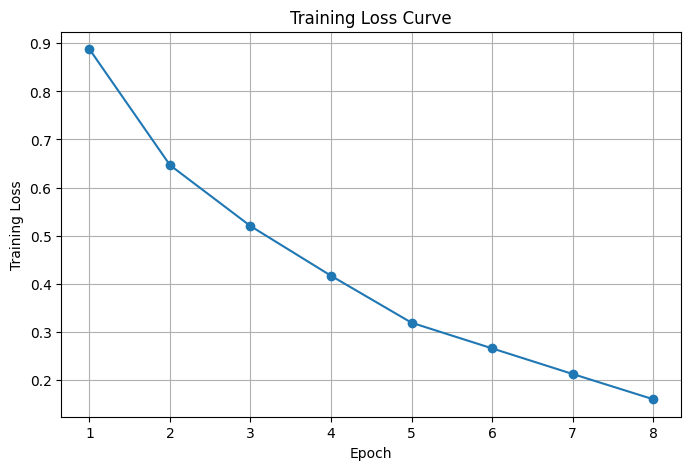

In [14]:
# Plot the training loss curve after training
plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS+1), train_losses, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, classification_report

model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, batch_labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        batch_labels = batch_labels.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(batch_labels)

accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"])
print(f"\nValidation Accuracy: {accuracy:.4f}")
print(report)



Validation Accuracy: 0.7627
              precision    recall  f1-score   support

    Negative       0.77      0.72      0.74       413
     Neutral       0.73      0.72      0.73       536
    Positive       0.79      0.87      0.83       391

    accuracy                           0.76      1340
   macro avg       0.77      0.77      0.77      1340
weighted avg       0.76      0.76      0.76      1340



In [16]:
model.save_pretrained("fine_tuned_xlm_roberta99")
tokenizer.save_pretrained("fine_tuned_xlm_roberta99")

print("Fine-tuned model saved successfully!")

Fine-tuned model saved successfully!



Validation Accuracy: 0.7627
              precision    recall  f1-score   support

    Negative       0.77      0.72      0.74       413
     Neutral       0.73      0.72      0.73       536
    Positive       0.79      0.87      0.83       391

    accuracy                           0.76      1340
   macro avg       0.77      0.77      0.77      1340
weighted avg       0.76      0.76      0.76      1340



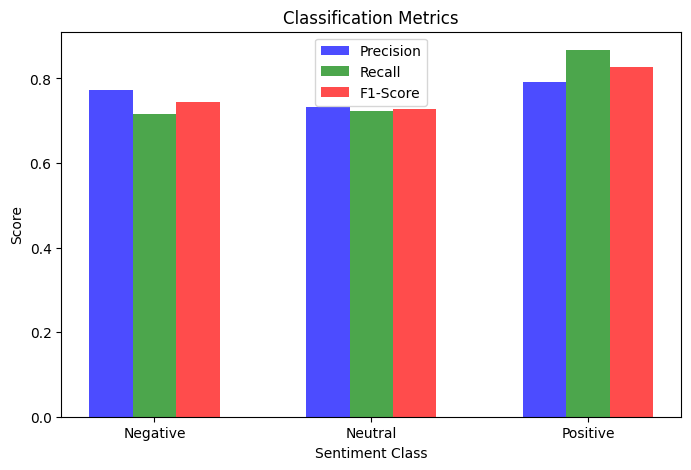

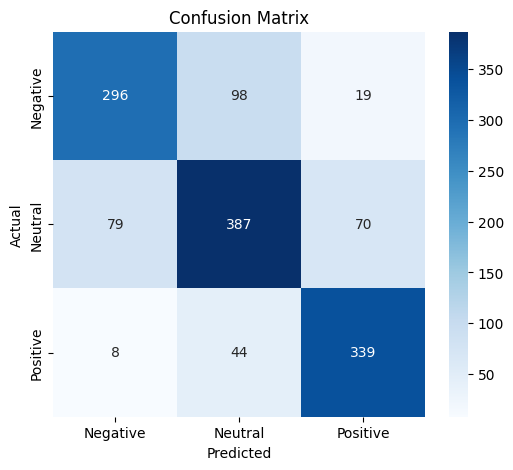

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, batch_labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        batch_labels = batch_labels.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(batch_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"], output_dict=True)
print(f"\nValidation Accuracy: {accuracy:.4f}")
print(classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"]))

# Extract precision, recall, f1-score
labels = ["Negative", "Neutral", "Positive"]
precision = [report[label]["precision"] for label in labels]
recall = [report[label]["recall"] for label in labels]
f1_score = [report[label]["f1-score"] for label in labels]

# Plot Precision, Recall, F1-Score
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width, precision, width, label='Precision', color='blue', alpha=0.7)
ax.bar(x, recall, width, label='Recall', color='green', alpha=0.7)
ax.bar(x + width, f1_score, width, label='F1-Score', color='red', alpha=0.7)

ax.set_xlabel("Sentiment Class")
ax.set_ylabel("Score")
ax.set_title("Classification Metrics")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Training and Validation Loss
def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label='Training Loss', marker='o', color='blue')
    plt.plot(val_losses, label='Validation Loss', marker='s', color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid()
    plt.show()



In [18]:
EPOCHS = 5
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    
    # Training Phase
    model.train()
    total_train_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Training Loss: {avg_train_loss:.4f}")
    
    # Validation Phase
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()
    
    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"Validation Loss: {avg_val_loss:.4f}")

# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS+1), train_losses, label='Training Loss', marker='o', color='blue')
plt.plot(range(1, EPOCHS+1), val_losses, label='Validation Loss', marker='s', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot the training loss curve after training
plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS+1), train_losses, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


from sklearn.metrics import accuracy_score, classification_report
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, batch_labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        batch_labels = batch_labels.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(batch_labels)

accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"])
print(f"\nValidation Accuracy: {accuracy:.4f}")
print(report)

model.save_pretrained("fine_tuned_xlm_roberta101")
tokenizer.save_pretrained("fine_tuned_xlm_roberta101")
print("Fine-tuned model saved successfully!")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, batch_labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        batch_labels = batch_labels.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(batch_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"], output_dict=True)
print(f"\nValidation Accuracy: {accuracy:.4f}")
print(classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"]))

# Extract precision, recall, f1-score
labels = ["Negative", "Neutral", "Positive"]
precision = [report[label]["precision"] for label in labels]
recall = [report[label]["recall"] for label in labels]
f1_score = [report[label]["f1-score"] for label in labels]

# Plot Precision, Recall, F1-Score
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width, precision, width, label='Precision', color='blue', alpha=0.7)
ax.bar(x, recall, width, label='Recall', color='green', alpha=0.7)
ax.bar(x + width, f1_score, width, label='F1-Score', color='red', alpha=0.7)

ax.set_xlabel("Sentiment Class")
ax.set_ylabel("Score")
ax.set_title("Classification Metrics")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Training and Validation Loss
def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label='Training Loss', marker='o', color='blue')
    plt.plot(val_losses, label='Validation Loss', marker='s', color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid()
    plt.show()




Epoch 1/5


Epoch 1/5: 100%|██████████| 335/335 [18:54<00:00,  3.39s/it]


Training Loss: 0.1369
Validation Loss: 0.8188

Epoch 2/5


Epoch 2/5: 100%|██████████| 335/335 [18:25<00:00,  3.30s/it]


Training Loss: 0.1067
Validation Loss: 0.9364

Epoch 3/5


Epoch 3/5: 100%|██████████| 335/335 [18:43<00:00,  3.35s/it]


Training Loss: 0.0902
Validation Loss: 1.0825

Epoch 4/5


Epoch 4/5:   7%|▋         | 23/335 [01:15<17:02,  3.28s/it]


KeyboardInterrupt: 

In [22]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

# Load the trained model
MODEL_NAME = "xlm-roberta-base"  # Change if using a different model
model_path = "C:\\Users\\ASUS\\Downloads\\PBL2\\New\\fine_tuned_xlm_roberta66"  # Update this with your actual trained model path

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors="pt")
    
    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        predicted_class = torch.argmax(probs, dim=1).item()
    
    # Mapping labels to sentiment
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[predicted_class], probs.tolist()

# Test the model with custom input
custom_text = "ye product bahot bekaar hai"  # Replace with any custom input
sentiment, probabilities = predict_sentiment(custom_text)
print(f"Predicted Sentiment: {sentiment}")
print(f"Class Probabilities: {probabilities}")

Predicted Sentiment: Negative
Class Probabilities: [[0.7825086712837219, 0.21224239468574524, 0.005248861853033304]]


Performing Gradual Unfreezing: Unfreeze Last 2 Encoder Layers and then further training for 5 epochs

In [ ]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# ---------- Data Loading & Tokenization ----------

# Load dataset
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\PBL2\\New\\cleaned_dataset_updated11.csv", encoding="latin-1")  # Adjust filename if needed

# Ensure 'clean_text' is processed and not empty
df["clean_text"] = df["clean_text"].astype(str).fillna("").str.strip()
df = df[df["clean_text"] != ""]

# Convert the 'actual' column to numeric
# If 'actual' contains sentiment words like "positive", "neutral", "negative", map them accordingly.
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
df["Sentiment"] = df["Sentiment"].str.strip().map(label_mapping)

# Drop rows where conversion failed (NaN)
df = df.dropna(subset=["Sentiment"])
df["Sentiment"] = df["Sentiment"].astype(int)

# Tokenize text
MODEL_NAME = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokens = tokenizer(df["clean_text"].tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Convert labels to tensor
labels = torch.tensor(df["Sentiment"].values, dtype=torch.long)

print("Tokenization complete. Sample tokenized text:", tokens["input_ids"][0])

# Create dataset and split into train and validation
dataset = TensorDataset(tokens["input_ids"], tokens["attention_mask"], labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

print(f"Training Samples: {train_size}, Validation Samples: {val_size}")

# ---------- Load Model and Setup Initial Training (Frozen Encoder) ----------

# Load XLM-RoBERTa with classification head (3 classes)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Freeze all encoder layers (roberta)
for param in model.roberta.parameters():
    param.requires_grad = False

# Set optimizer: Only classifier parameters will be updated
optimizer = AdamW(model.classifier.parameters(), lr=3e-5)
criterion = torch.nn.CrossEntropyLoss()

# Train only the classifier head for a few epochs (e.g., 3 epochs)
INITIAL_EPOCHS = 3
print("Starting initial training with frozen encoder...")
for epoch in range(INITIAL_EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{INITIAL_EPOCHS}"):
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels_batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")

# ---------- Gradual Unfreezing: Unfreeze Last 2 Encoder Layers ----------

# Unfreeze the last 2 encoder layers of XLM-RoBERTa
for layer in model.roberta.encoder.layer[-2:]:
    for param in layer.parameters():
        param.requires_grad = True

# Setup optimizer with differential learning rates:
# - Lower LR for the base encoder
# - Higher LR for the classifier head
optimizer = AdamW([
    {'params': model.roberta.parameters(), 'lr': 1e-5},
    {'params': model.classifier.parameters(), 'lr': 3e-5}
])

# ---------- Continue Training with Unfrozen Layers ----------

FINE_TUNE_EPOCHS = 5  # Continue training for 5 additional epochs
print("Continuing training with gradual unfreezing (last 2 encoder layers unfrozen)...")
for epoch in range(FINE_TUNE_EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{FINE_TUNE_EPOCHS}"):
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels_batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")

# ---------- Evaluation on Validation Set ----------

model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        labels_batch = labels_batch.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels_batch)

accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"])
print(f"\nValidation Accuracy: {accuracy:.4f}")
print(report)

# ---------- Save the Fine-Tuned Model ----------
model.save_pretrained("fine_tuned_xlm_roberta22")
tokenizer.save_pretrained("fine_tuned_xlm_roberta22")
print("Fine-tuned model saved successfully!")

Tokenization complete. Sample tokenized text: tensor([     0,  15889,  12878,  13969,  18548,     57,    979,  52566, 130658,
            53,  28192,   2174,  43904,  44930,     83,    959,  81113,    291,
         68923,   6494,  20566,   1274,     79,   1033,    735,      2,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,   

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Starting initial training with frozen encoder...


Epoch 1/3: 100%|██████████| 320/320 [00:58<00:00,  5.50it/s]


Epoch 1 Loss: 1.0868


Epoch 2/3: 100%|██████████| 320/320 [00:58<00:00,  5.51it/s]


Epoch 2 Loss: 1.0682


Epoch 3/3: 100%|██████████| 320/320 [00:58<00:00,  5.49it/s]


Epoch 3 Loss: 1.0479
Continuing training with gradual unfreezing (last 2 encoder layers unfrozen)...


Epoch 1/5: 100%|██████████| 320/320 [01:18<00:00,  4.09it/s]


Epoch 1 Loss: 0.8526


Epoch 2/5: 100%|██████████| 320/320 [01:19<00:00,  4.05it/s]


Epoch 2 Loss: 0.7351


Epoch 3/5: 100%|██████████| 320/320 [01:18<00:00,  4.05it/s]


Epoch 3 Loss: 0.6715


Epoch 4/5: 100%|██████████| 320/320 [01:02<00:00,  5.13it/s]


Epoch 4 Loss: 0.6414


Epoch 5/5: 100%|██████████| 320/320 [00:47<00:00,  6.73it/s]


Epoch 5 Loss: 0.6243

Validation Accuracy: 0.7609
              precision    recall  f1-score   support

    Negative       0.74      0.78      0.76       386
     Neutral       0.73      0.70      0.71       512
    Positive       0.82      0.83      0.82       382

    accuracy                           0.76      1280
   macro avg       0.76      0.77      0.77      1280
weighted avg       0.76      0.76      0.76      1280

Fine-tuned model saved successfully!


Accuracy we got is 65%.
To Improve Accuracy: ie Use Focal Loss Instead of CrossEntropyLoss
Further Fine-Tuning with More Layers Unfrozen

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# ----------------------- Data Loading & Tokenization -----------------------

# Load dataset (assumes preprocessed dataset with 'clean_text' and numeric 'actual' labels)
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\PBL2\\New\\cleaned_dataset_updated11.csv", encoding="latin-1")  # Adjust filename as needed

# Ensure 'clean_text' is a non-empty string
df["clean_text"] = df["clean_text"].astype(str).fillna("").str.strip()
df = df[df["clean_text"] != ""]

# Map sentiment labels if needed (assuming 'actual' holds string labels)
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
df["actual_numeric"] = df["Sentiment"].astype(str).str.strip().str.lower().map(label_mapping)
df = df.dropna(subset=["actual_numeric"])
df["actual_numeric"] = df["actual_numeric"].astype(int)

# Tokenizer and model parameters
MODEL_NAME = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Tokenize text
tokens = tokenizer(df["clean_text"].tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")
labels = torch.tensor(df["actual_numeric"].values, dtype=torch.long)

# Create dataset and split into train and validation
dataset = TensorDataset(tokens["input_ids"], tokens["attention_mask"], labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
BATCH_SIZE = 16
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

print(f"Training Samples: {train_size}, Validation Samples: {val_size}")

# ----------------------- Define Focal Loss -----------------------

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        """
        :param alpha: Weighting factor for the class (scalar or list for each class)
        :param gamma: Focusing parameter
        :param reduction: 'mean' or 'sum'
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        # inputs: (batch_size, num_classes)
        logpt = -F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(logpt)
        # If alpha is a tensor or list for per-class weighting, ensure it is on the correct device
        if isinstance(self.alpha, (list, tuple)):
            alpha = torch.tensor(self.alpha).to(inputs.device)
        else:
            alpha = self.alpha
        loss = -alpha * (1 - pt) ** self.gamma * logpt
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

# Optionally, compute class weights from training data for focal loss alpha
# For example, here we simply set alpha=1; you can also use weighted alpha.
focal_loss = FocalLoss(alpha=1, gamma=2, reduction='mean')

# ----------------------- Load Model & Initial Training with Frozen Encoder -----------------------

# Load XLM-RoBERTa with classification head (3 classes)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Freeze all encoder layers (roberta)
for param in model.roberta.parameters():
    param.requires_grad = False

# Set optimizer: Only classifier parameters will be updated initially
optimizer = AdamW(model.classifier.parameters(), lr=3e-5)

INITIAL_EPOCHS = 3
print("Starting initial training with frozen encoder...")
for epoch in range(INITIAL_EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{INITIAL_EPOCHS}"):
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels_batch)
        loss = focal_loss(outputs.logits, labels_batch)  # Use focal loss instead of standard cross-entropy
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")

# ----------------------- Gradual Unfreezing: Unfreeze Last 4 Encoder Layers -----------------------

# Unfreeze the last 4 encoder layers of XLM-RoBERTa
for layer in model.roberta.encoder.layer[-4:]:
    for param in layer.parameters():
        param.requires_grad = True

# Setup optimizer with differential learning rates:
# - Lower LR for the base encoder, higher for the classifier head
optimizer = AdamW([
    {'params': model.roberta.parameters(), 'lr': 1e-5},
    {'params': model.classifier.parameters(), 'lr': 3e-5}
])

FINE_TUNE_EPOCHS = 5  # Continue training for 5 additional epochs
print("Continuing training with gradual unfreezing (last 4 encoder layers unfrozen)...")
for epoch in range(FINE_TUNE_EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{FINE_TUNE_EPOCHS}"):
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels_batch)
        loss = focal_loss(outputs.logits, labels_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")

# ----------------------- Evaluation on Validation Set -----------------------

model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        labels_batch = labels_batch.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels_batch)

accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"])
print(f"\nValidation Accuracy: {accuracy:.4f}")
print(report)

# ----------------------- Save the Fine-Tuned Model -----------------------
model.save_pretrained("fine_tuned_xlm_roberta_focal77")
tokenizer.save_pretrained("fine_tuned_xlm_roberta_focal77")
print("Fine-tuned model saved successfully!")

Training Samples: 5359, Validation Samples: 1340


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Starting initial training with frozen encoder...


Epoch 1/3: 100%|██████████| 335/335 [01:01<00:00,  5.46it/s]


Epoch 1 Loss: 0.4827


Epoch 2/3: 100%|██████████| 335/335 [01:00<00:00,  5.53it/s]


Epoch 2 Loss: 0.4671


Epoch 3/3: 100%|██████████| 335/335 [01:00<00:00,  5.51it/s]


Epoch 3 Loss: 0.4570
Continuing training with gradual unfreezing (last 4 encoder layers unfrozen)...


Epoch 1/5: 100%|██████████| 335/335 [01:42<00:00,  3.26it/s]


Epoch 1 Loss: 0.3309


Epoch 2/5: 100%|██████████| 335/335 [01:42<00:00,  3.26it/s]


Epoch 2 Loss: 0.2686


Epoch 3/5: 100%|██████████| 335/335 [01:44<00:00,  3.21it/s]


Epoch 3 Loss: 0.2391


Epoch 4/5: 100%|██████████| 335/335 [01:42<00:00,  3.26it/s]


Epoch 4 Loss: 0.2219


Epoch 5/5: 100%|██████████| 335/335 [01:42<00:00,  3.26it/s]


Epoch 5 Loss: 0.1974

Validation Accuracy: 0.7351
              precision    recall  f1-score   support

    Negative       0.82      0.58      0.68       437
     Neutral       0.62      0.79      0.70       483
    Positive       0.84      0.83      0.83       420

    accuracy                           0.74      1340
   macro avg       0.76      0.73      0.74      1340
weighted avg       0.76      0.74      0.73      1340

Fine-tuned model saved successfully!


In [ ]:
'''from transformers import get_cosine_schedule_with_warmup
from tqdm import tqdm
import torch

# Set total training epochs (e.g., 10 epochs)
TOTAL_EPOCHS = 10
num_training_steps = len(train_loader) * TOTAL_EPOCHS

# Create a cosine learning rate scheduler with warmup (10% of steps)
scheduler = get_cosine_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=int(0.1 * num_training_steps), 
                                            num_training_steps=num_training_steps)

print("Starting extended training with learning rate scheduler...")
for epoch in range(TOTAL_EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{TOTAL_EPOCHS}"):
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels_batch)
        loss = focal_loss(outputs.logits, labels_batch)  # or use outputs.loss if not using focal_loss
        loss.backward()
        optimizer.step()
        scheduler.step()  # Update the learning rate scheduler each batch
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} Loss: {avg_loss:.4f}")

    # ----------------------- Evaluation on Validation Set -----------------------

model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        labels_batch = labels_batch.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels_batch)

accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"])
print(f"\nValidation Accuracy: {accuracy:.4f}")
print(report)

# ----------------------- Save the Fine-Tuned Model -----------------------
model.save_pretrained("fine_tuned_xlm_roberta_focal44")
tokenizer.save_pretrained("fine_tuned_xlm_roberta_focal44")
print("Fine-tuned model saved successfully!")
'''

Starting extended training with learning rate scheduler...


Epoch 1/10: 100%|██████████| 320/320 [01:01<00:00,  5.23it/s]


Epoch 1 Loss: 0.1667


Epoch 2/10: 100%|██████████| 320/320 [01:01<00:00,  5.23it/s]


Epoch 2 Loss: 0.1697


Epoch 3/10: 100%|██████████| 320/320 [01:02<00:00,  5.15it/s]


Epoch 3 Loss: 0.1591


Epoch 4/10: 100%|██████████| 320/320 [01:02<00:00,  5.15it/s]


Epoch 4 Loss: 0.1431


Epoch 5/10: 100%|██████████| 320/320 [01:07<00:00,  4.75it/s]


Epoch 5 Loss: 0.1371


Epoch 6/10: 100%|██████████| 320/320 [01:05<00:00,  4.86it/s]


Epoch 6 Loss: 0.1277


Epoch 7/10: 100%|██████████| 320/320 [01:08<00:00,  4.69it/s]


Epoch 7 Loss: 0.1108


Epoch 8/10: 100%|██████████| 320/320 [01:09<00:00,  4.59it/s]


Epoch 8 Loss: 0.1109


Epoch 9/10: 100%|██████████| 320/320 [01:07<00:00,  4.76it/s]


Epoch 9 Loss: 0.1076


Epoch 10/10: 100%|██████████| 320/320 [01:40<00:00,  3.17it/s]


Epoch 10 Loss: 0.1021

Validation Accuracy: 0.7719
              precision    recall  f1-score   support

    Negative       0.77      0.77      0.77       368
     Neutral       0.77      0.70      0.73       526
    Positive       0.78      0.88      0.82       386

    accuracy                           0.77      1280
   macro avg       0.77      0.78      0.77      1280
weighted avg       0.77      0.77      0.77      1280

Fine-tuned model saved successfully!


As loss is still decreasing and model is learning, we will train for more epochs but ensure that it does not overfit, so applying early stopping

In [6]:
import copy
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report
from transformers import get_cosine_schedule_with_warmup
# Set parameters for early stopping
patience = 3  # Number of epochs to wait for improvement before stopping
best_val_loss = float('inf')
best_model_state = None
patience_counter = 0

TOTAL_EPOCHS = 20  # Maximum number of epochs you want to run
num_training_steps = len(train_loader) * TOTAL_EPOCHS

# Create a cosine learning rate scheduler with warmup (10% of steps)
scheduler = get_cosine_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=int(0.1 * num_training_steps), 
                                            num_training_steps=num_training_steps)
print("Starting extended training with early stopping...")

for epoch in range(TOTAL_EPOCHS):
    # Training phase
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{TOTAL_EPOCHS}"):
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels_batch)
        loss = focal_loss(outputs.logits, labels_batch)  # Use focal_loss if defined; else use outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()  # Update LR scheduler if you're using one
        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_loader)
    
    # Evaluation phase on validation set
    model.eval()
    total_val_loss = 0
    for batch in val_loader:
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels_batch)
            loss = focal_loss(outputs.logits, labels_batch)
            total_val_loss += loss.item()
    avg_val_loss = total_val_loss / len(val_loader)
    
    print(f"Epoch {epoch+1} -- Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")
    
    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = copy.deepcopy(model.state_dict())
        patience_counter = 0
        print("Validation loss improved, saving best model...")
    else:
        patience_counter += 1
        print(f"No improvement in validation loss for {patience_counter} epoch(s).")
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Restore the best model state before proceeding
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("Best model state restored.")

# Optional: Evaluate final performance
model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels_batch = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        labels_batch = labels_batch.cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels_batch)
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"])
print(f"\nFinal Validation Accuracy: {accuracy:.4f}")
print(report)
# ----------------------- Save the Fine-Tuned Model -----------------------
model.save_pretrained("fine_tuned_xlm_roberta_focal88")
tokenizer.save_pretrained("fine_tuned_xlm_roberta_focal88")
print("Fine-tuned model saved successfully!")

Starting extended training with early stopping...


Training Epoch 1/20: 100%|██████████| 335/335 [01:24<00:00,  3.96it/s]


Epoch 1 -- Training Loss: 0.1819, Validation Loss: 0.2068
Validation loss improved, saving best model...


Training Epoch 2/20: 100%|██████████| 335/335 [01:04<00:00,  5.21it/s]


Epoch 2 -- Training Loss: 0.1802, Validation Loss: 0.2050
Validation loss improved, saving best model...


Training Epoch 3/20: 100%|██████████| 335/335 [01:04<00:00,  5.21it/s]


Epoch 3 -- Training Loss: 0.1765, Validation Loss: 0.2007
Validation loss improved, saving best model...


Training Epoch 4/20: 100%|██████████| 335/335 [01:04<00:00,  5.23it/s]


Epoch 4 -- Training Loss: 0.1603, Validation Loss: 0.2085
No improvement in validation loss for 1 epoch(s).


Training Epoch 5/20: 100%|██████████| 335/335 [01:04<00:00,  5.22it/s]


Epoch 5 -- Training Loss: 0.1500, Validation Loss: 0.2086
No improvement in validation loss for 2 epoch(s).


Training Epoch 6/20: 100%|██████████| 335/335 [01:04<00:00,  5.23it/s]


Epoch 6 -- Training Loss: 0.1352, Validation Loss: 0.2261
No improvement in validation loss for 3 epoch(s).
Early stopping triggered.
Best model state restored.

Final Validation Accuracy: 0.7590
              precision    recall  f1-score   support

    Negative       0.74      0.79      0.77       437
     Neutral       0.72      0.65      0.68       483
    Positive       0.82      0.85      0.84       420

    accuracy                           0.76      1340
   macro avg       0.76      0.76      0.76      1340
weighted avg       0.76      0.76      0.76      1340

Fine-tuned model saved successfully!


Predicted Sentiment: Neutral
Class Probabilities: [[0.4878997504711151, 0.49342280626296997, 0.018677502870559692]]


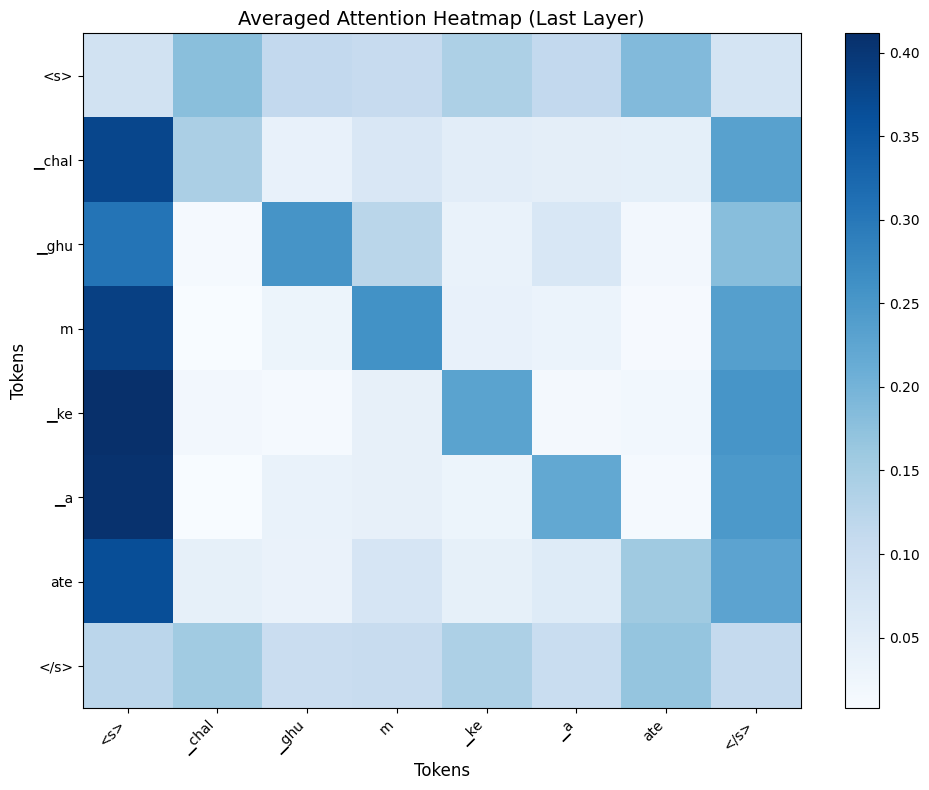

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def visualize_attention_simple(text, tokenizer, model, device="cpu"):
    # Tokenize input text and move tensors to device
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128, return_attention_mask=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Ensure inputs are on the same device as the model
    
    # Run the model with output_attentions enabled
    outputs = model(**inputs, output_attentions=True)
    
    # Extract attentions from the last layer; shape: (batch_size, num_heads, seq_len, seq_len)
    last_layer_attn = outputs.attentions[-1]
    
    # Average attention weights over all heads for simplicity
    attn_avg = last_layer_attn.mean(dim=1)[0].detach().cpu().numpy()  # shape: (seq_len, seq_len)
    
    # Get tokens and filter out padding tokens
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    pad_token = tokenizer.pad_token
    # If pad_token is None, assume it's a known id (typically 1)
    valid_tokens = [token for token in tokens if token != pad_token and token.strip() != ""]
    seq_len = len(valid_tokens)
    attn_avg = attn_avg[:seq_len, :seq_len]
    
    # Plot a simplified heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(attn_avg, cmap="Blues", aspect="auto")
    plt.xticks(range(seq_len), valid_tokens, rotation=45, ha='right', fontsize=10)
    plt.yticks(range(seq_len), valid_tokens, fontsize=10)
    plt.colorbar()
    plt.title("Averaged Attention Heatmap (Last Layer)", fontsize=14)
    plt.xlabel("Tokens", fontsize=12)
    plt.ylabel("Tokens", fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage:
MODEL_NAME = "C:\\Users\\ASUS\\Downloads\\PBL2\\New\\fine_tuned_xlm_roberta99"  # Update with your model path if needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, output_attentions=True)
model.to(device)
model.eval()

# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Ensure inputs are on the same device as the model
    
    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        predicted_class = torch.argmax(probs, dim=1).item()
    
    # Mapping labels to sentiment
    label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return label_map[predicted_class], probs.tolist()

sample_text = "chal ghum ke aate"
# Test the model with custom input
sentiment, probabilities = predict_sentiment(sample_text)
print(f"Predicted Sentiment: {sentiment}")
print(f"Class Probabilities: {probabilities}")
visualize_attention_simple(sample_text, tokenizer, model, device)
